In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

picher_file_path = '../python-data-analysis/data/picher_stats_2017.csv'
batter_file_path = '../python-data-analysis/data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [2]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


#### 한글 폰트 설정

In [3]:
from matplotlib import font_manager
from matplotlib import rc

for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'NanumGothic' in font:
        print(font)

C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothicLight.ttf
C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothicBold.otf
C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothicBold.ttf
C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothicLight.otf
C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf
C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothicExtraBold.otf
C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.otf
C:\Users\shash\AppData\Local\Microsoft\Windows\Fonts\NanumGothicExtraBold.ttf


In [24]:
font_path = "C:/Users/shash/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf" 
font_prop = font_manager.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())

In [5]:
print(picher.shape)

(152, 22)


## [Y는 연봉(2018)](#Y는-연봉(2018))

In [6]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

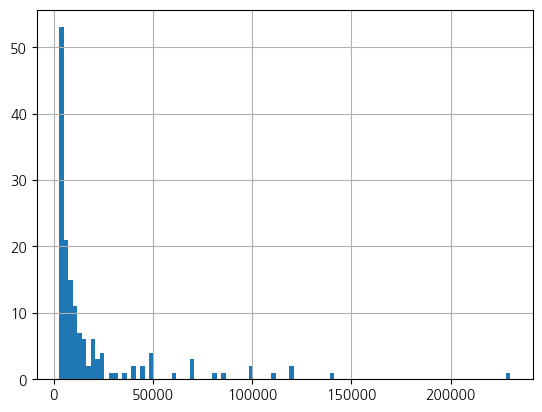

In [7]:
picher['연봉(2018)'].hist(bins=100)

<Axes: >

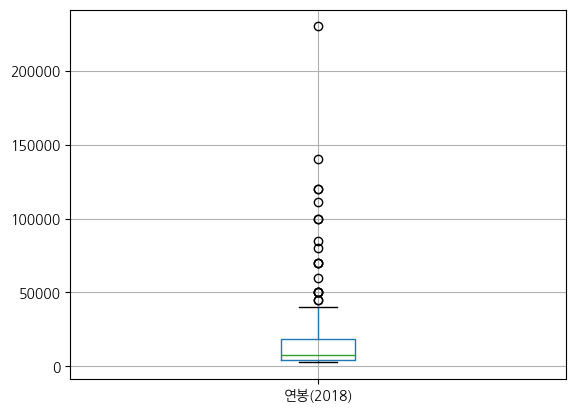

In [8]:
picher.boxplot(column=['연봉(2018)'])

#### 수치형 feature에 대한 분포 파악

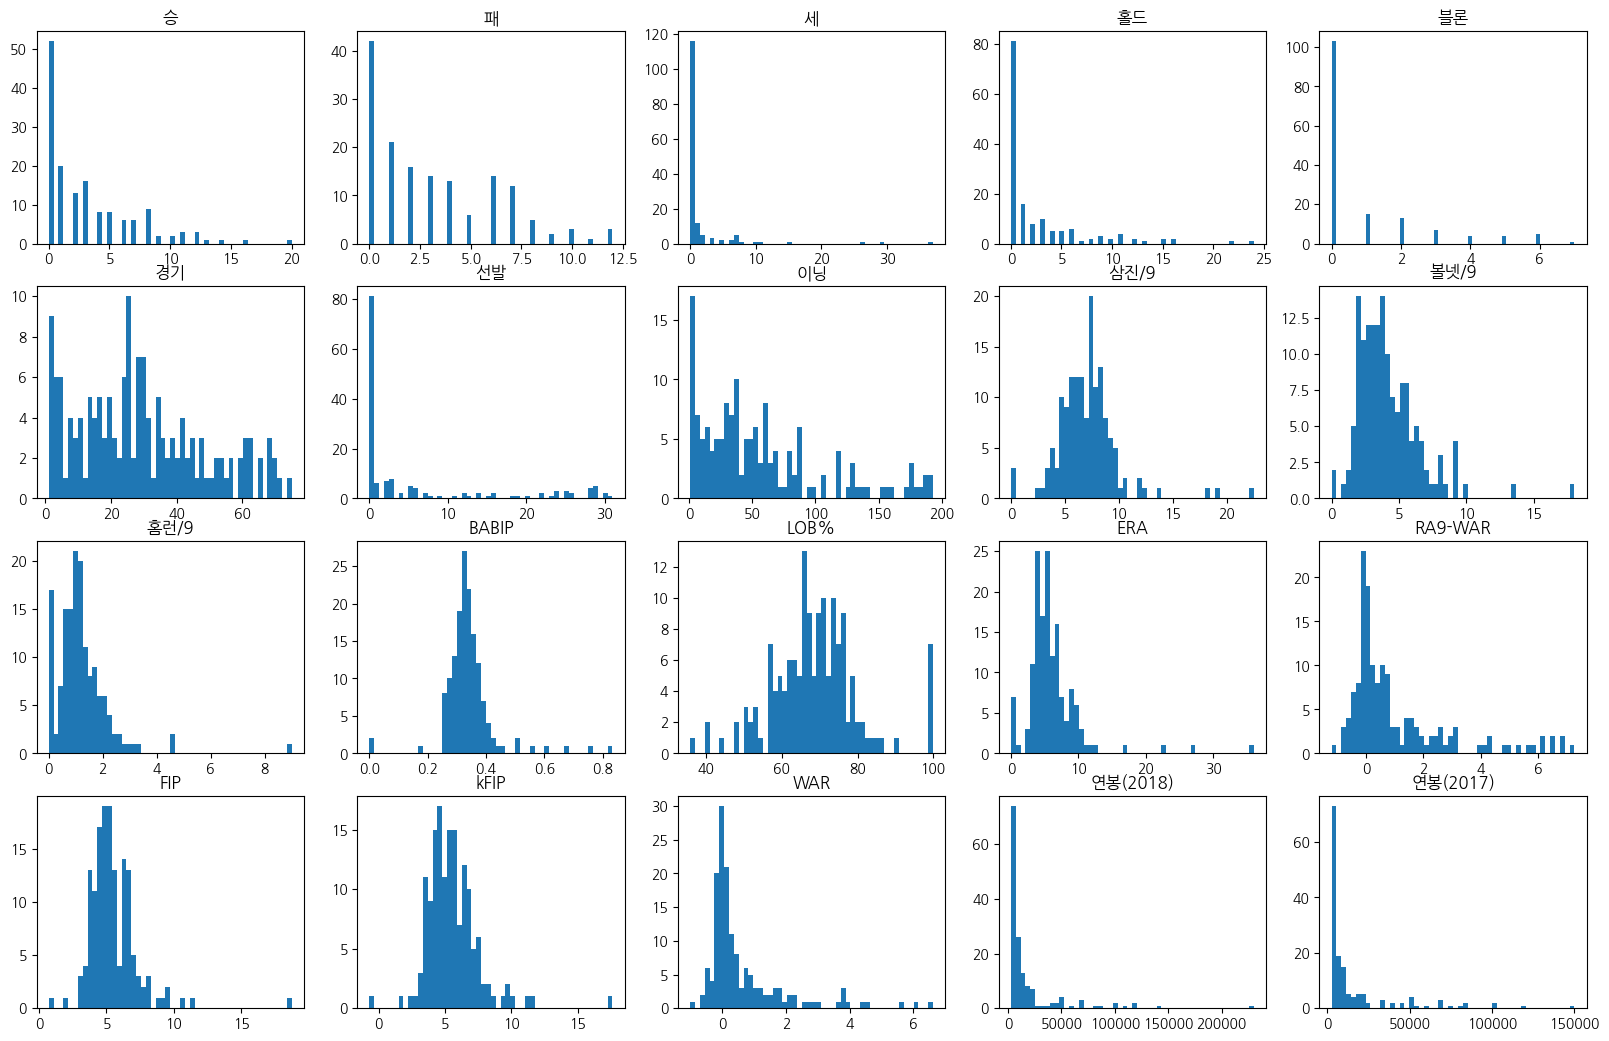

In [9]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

# 각 feature에 대해 histogram 출력하는 함수
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

plot_hist_each_column(picher_features_df)

- 위 데이터들은 단위가 다 다르다 => 정규화(스케일링)되어있지 않다
- 정규화 진행

In [10]:
pd.options.mode.chained_assignment = None

# 스케일링 함수
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
        return df

scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,2.019505,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,4.348918,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,1.760682,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,2.537153,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


#### 범주형 feature는 원핫 인코딩 방식으로 정규화

In [11]:
# 범주형 변수를 원-핫 인코딩
team_encoding = pd.get_dummies(picher_df['팀명'], dtype=int)
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [13]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습이 완료된 회귀식의 계수
print(lr.coef_)

[-1.66433649e+04 -1.00005486e+02 -5.03120671e+04 -1.56086205e+03
  1.57200472e+03 -7.47049524e+02 -1.18666920e+02 -5.23546876e+02
  2.14736071e+03  8.98376390e+02  7.76920737e+03  3.91969663e+04
 -1.25668595e+02 -8.92118013e+02  4.49911172e+02  3.22164149e+03
  7.77935715e+02 -2.81055645e+03  1.90870829e+03 -4.92026373e+02
 -5.21324705e+01  2.36025301e+02  7.63803603e-01  1.69794484e+01
  4.15729514e+02  3.61384063e+03 -2.07081858e+02  1.78400390e+04]


In [14]:
!pip install statsmodels

In [15]:
import statsmodels.api as sm

# 회귀분석
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 28 May 2024   Prob (F-statistic):           7.70e-42
Time:                        15:51:43   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.591e+04   2.08e+04      1.246      0.216   -1.54e+04    6.72e+04
BABIP      -1.664e+04   1.45e+04     -1.145      0.255   -4.55e+04    1.22e+04
ERA         -100.0055    557.379     -0.179      0.858   -1206.850    1006.839
FIP        -5.031e+04   5.04e+04     -0.998      0.321    -1.5e+05    4.98e+04
KIA         1317.9412   2954.415      0.446      0.657   -4548.941    7184.823
KT          4450.8079   3178.624      1.400      0.165   -1861.310    1.08e+04
LG          2131.7537   2842.243      0.750      0.455   -3512.378    7775.885
LOB%        -118.6669    134.995     -0.879      0.382    -386.740     149.406
NC          2355.2563   3713.995      0.634      0.528   -5020.002    9730.514
RA9-WAR     2147.3607   1589.996      1.351      0.180   -1010.055    5304.777
SK          3777.1796   2799.284      1.349      0.181   -1781.644    9336.004
WAR         7769.2074   1915.216      4.057      0.000    3965.967    1.16e+04
kFIP         3.92e+04   4.01e+04      0.977      0.331   -4.05e+04    1.19e+05
경기          -125.6686    152.468     -0.824      0.412    -428.439     177.102
두산          1986.6852   3665.539      0.542      0.589   -5292.349    9265.719
롯데          3328.7144   3332.488      0.999      0.320   -3288.946    9946.374
볼넷/9        3221.6415   2655.869      1.213      0.228   -2052.388    8495.671
블론           777.9357    760.237      1.023      0.309    -731.745    2287.616
삼성            68.2468   3734.016      0.018      0.985   -7346.768    7483.262
삼진/9        1908.7083   2576.865      0.741      0.461   -3208.435    7025.852
선발          -492.0264    563.005     -0.874      0.384   -1610.043     625.990
세            -52.1325    269.373     -0.194      0.847    -587.054     482.789
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)       0.7638      0.051     15.055      0.000       0.663       0.865
이닝            16.9794    131.695      0.129      0.898    -244.540     278.499
패            415.7295    618.326      0.672      0.503    -812.143    1643.602
한화          6492.6438   3541.464      1.833      0.070    -540.002    1.35e+04
홀드          -207.0819    362.736     -0.571      0.569    -927.403     513.239
홈런/9        1.784e+04   1.65e+04      1.082      0.282   -1.49e+04    5.06e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     2.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

- F 통계량에 대한 p-value인 t-statistics값을 잘 살펴보자 (0.05미만인지)

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

C:\Users\shash\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\shash\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


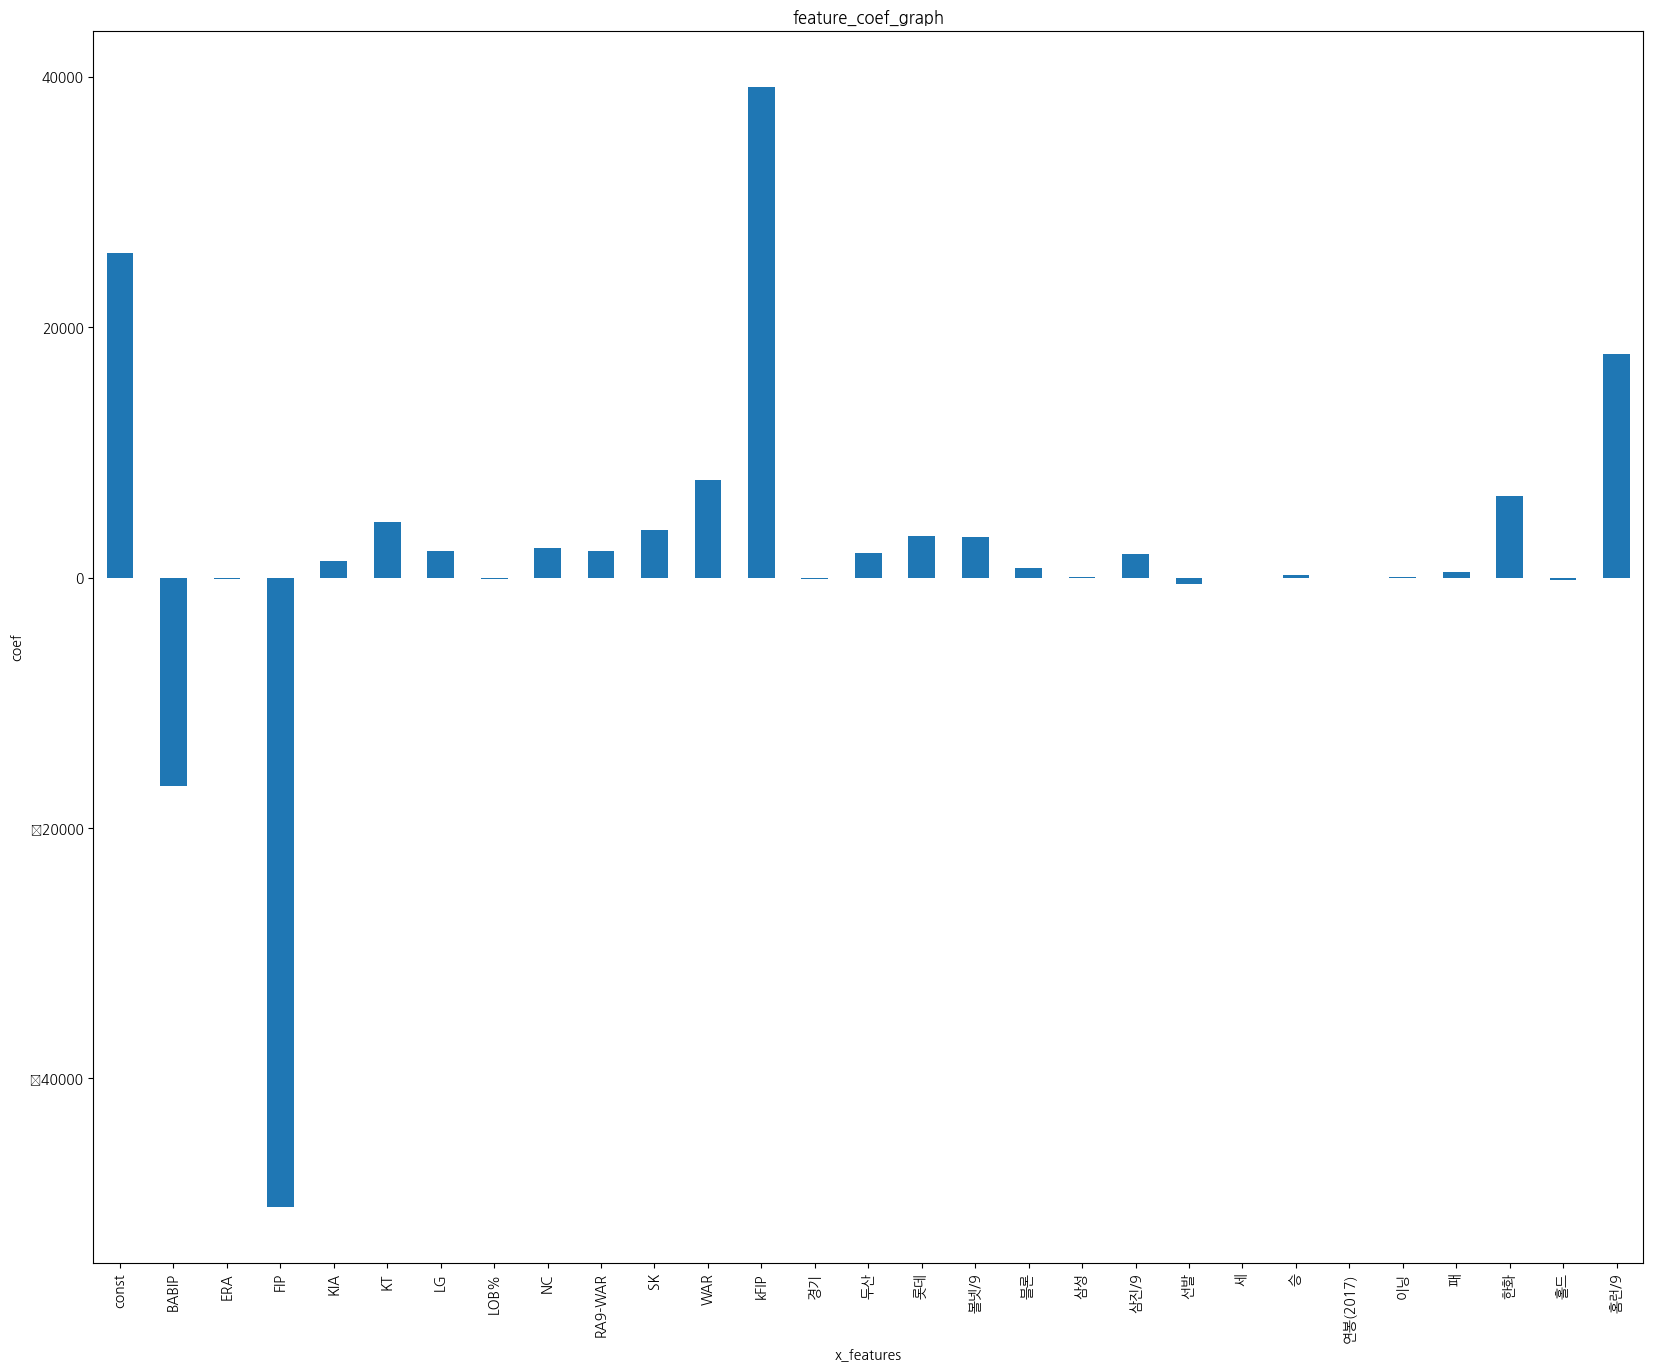

In [16]:
# feature들의 영향력에 대한 시각화
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

### 에측 모델 평가: R2 score

In [17]:
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9276949405576705
0.8860171644977728


### 예측 모델 평가: RMSE score

In [18]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

7282.7186847463745
14310.696436889699


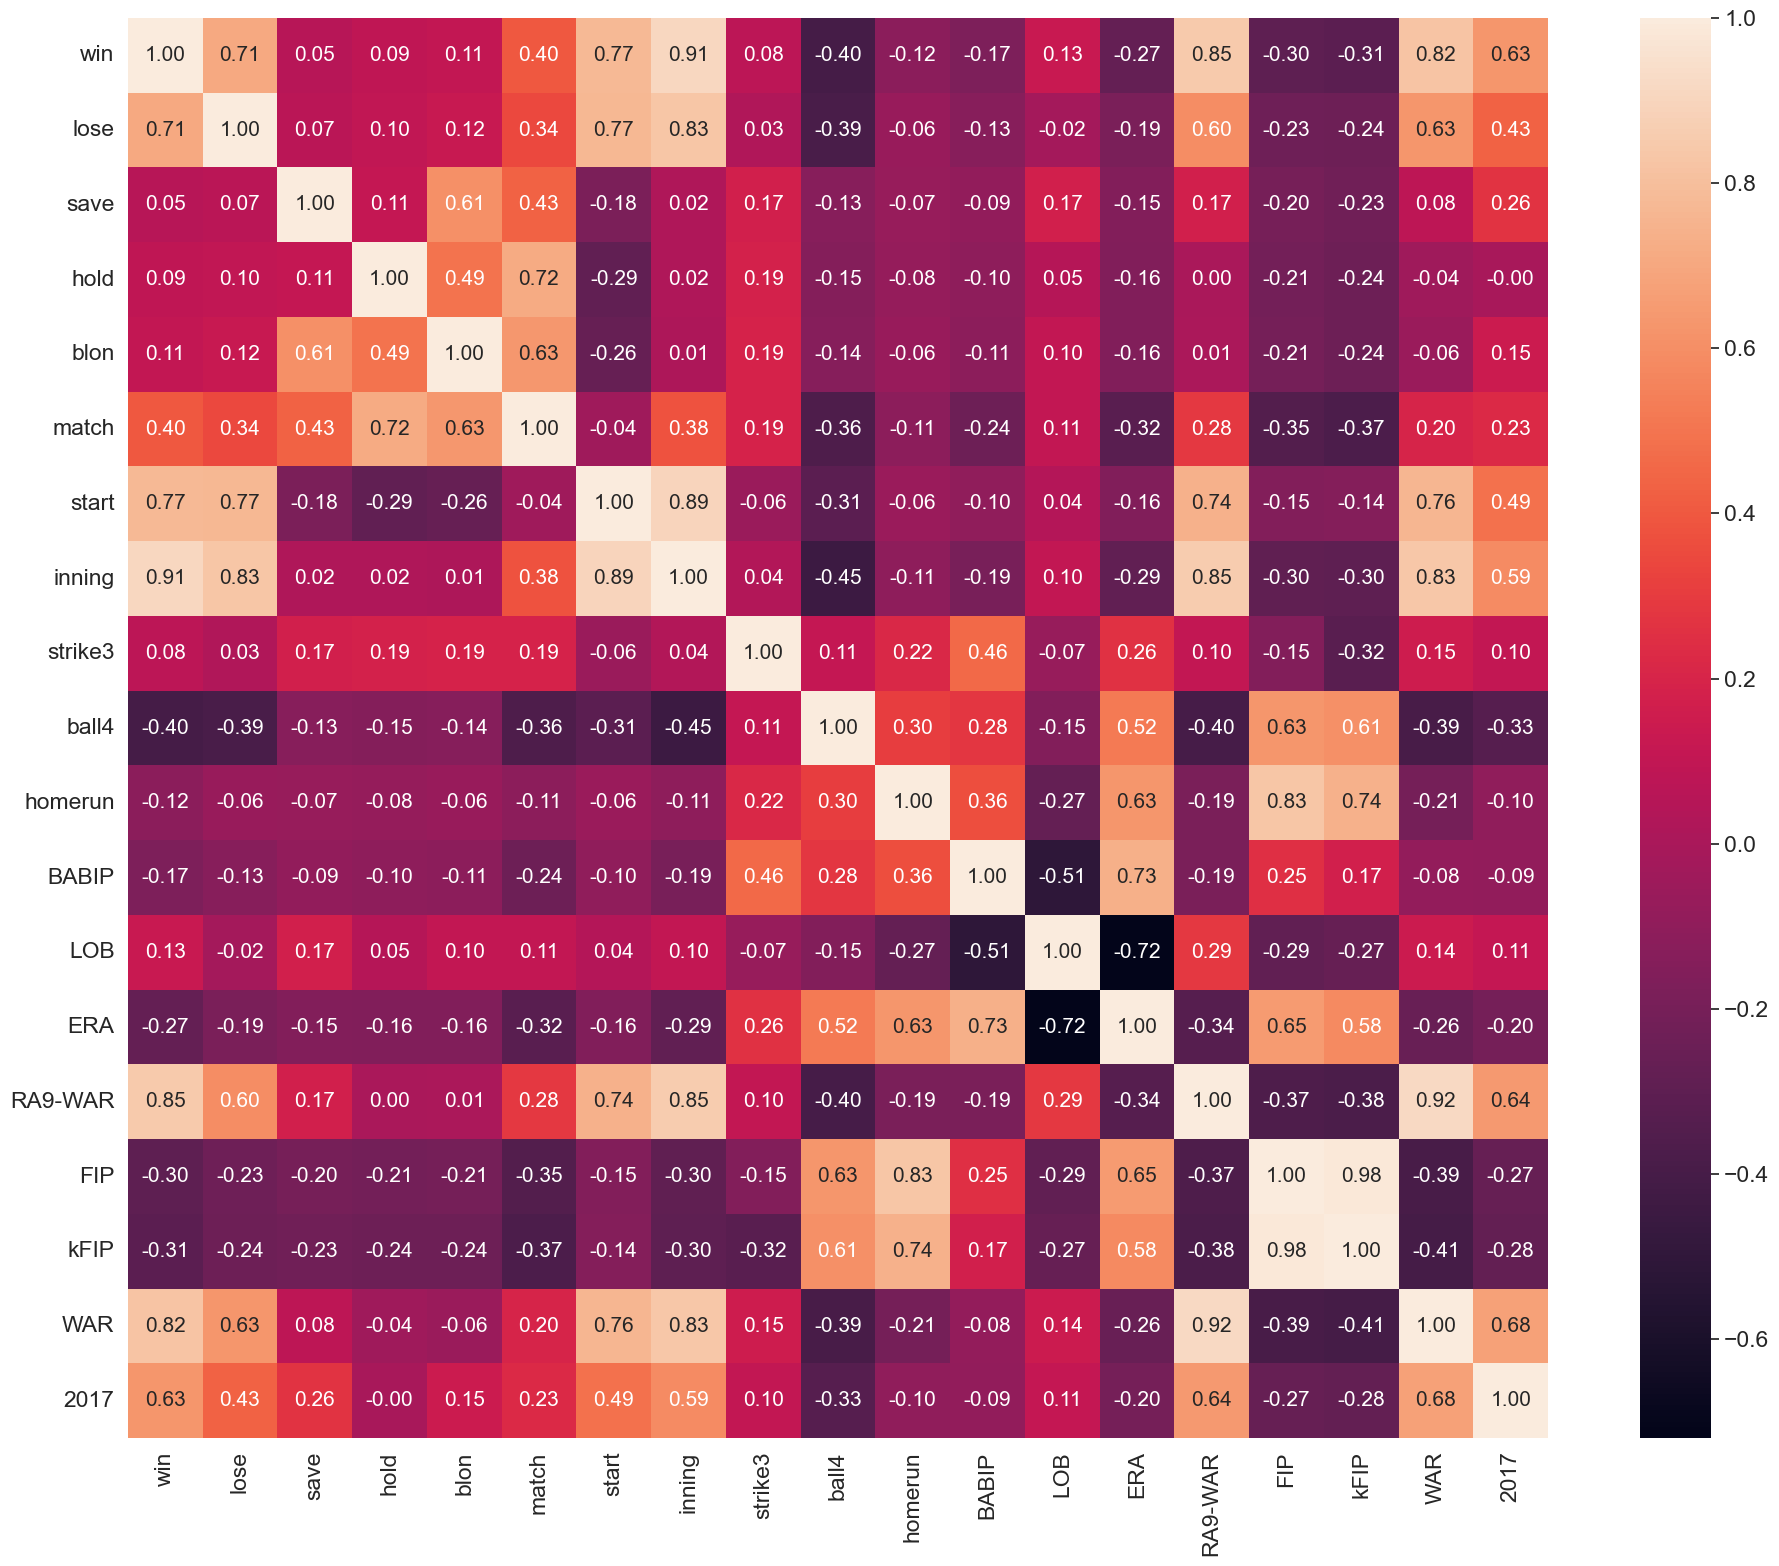

In [19]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

plt.rc('font', family='NanumGothicOTP')
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)
plt.tight_layout()
plt.show()

## 다중 공선성
- 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
- 다중 공선성은 분산팽창요인(VIF) 계수로 평가 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,67.8,KIA
4,87.4,KT
5,80.3,LG
6,4.3,LOB%
7,61.6,NC
8,13.6,RA9-WAR
9,78.2,SK


### 적절한 피처로 다시 학습

In [21]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

## 시각화

In [22]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

# 원래의 데이터 프레임을 다시 로드
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합침
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<Axes: xlabel='선수명'>

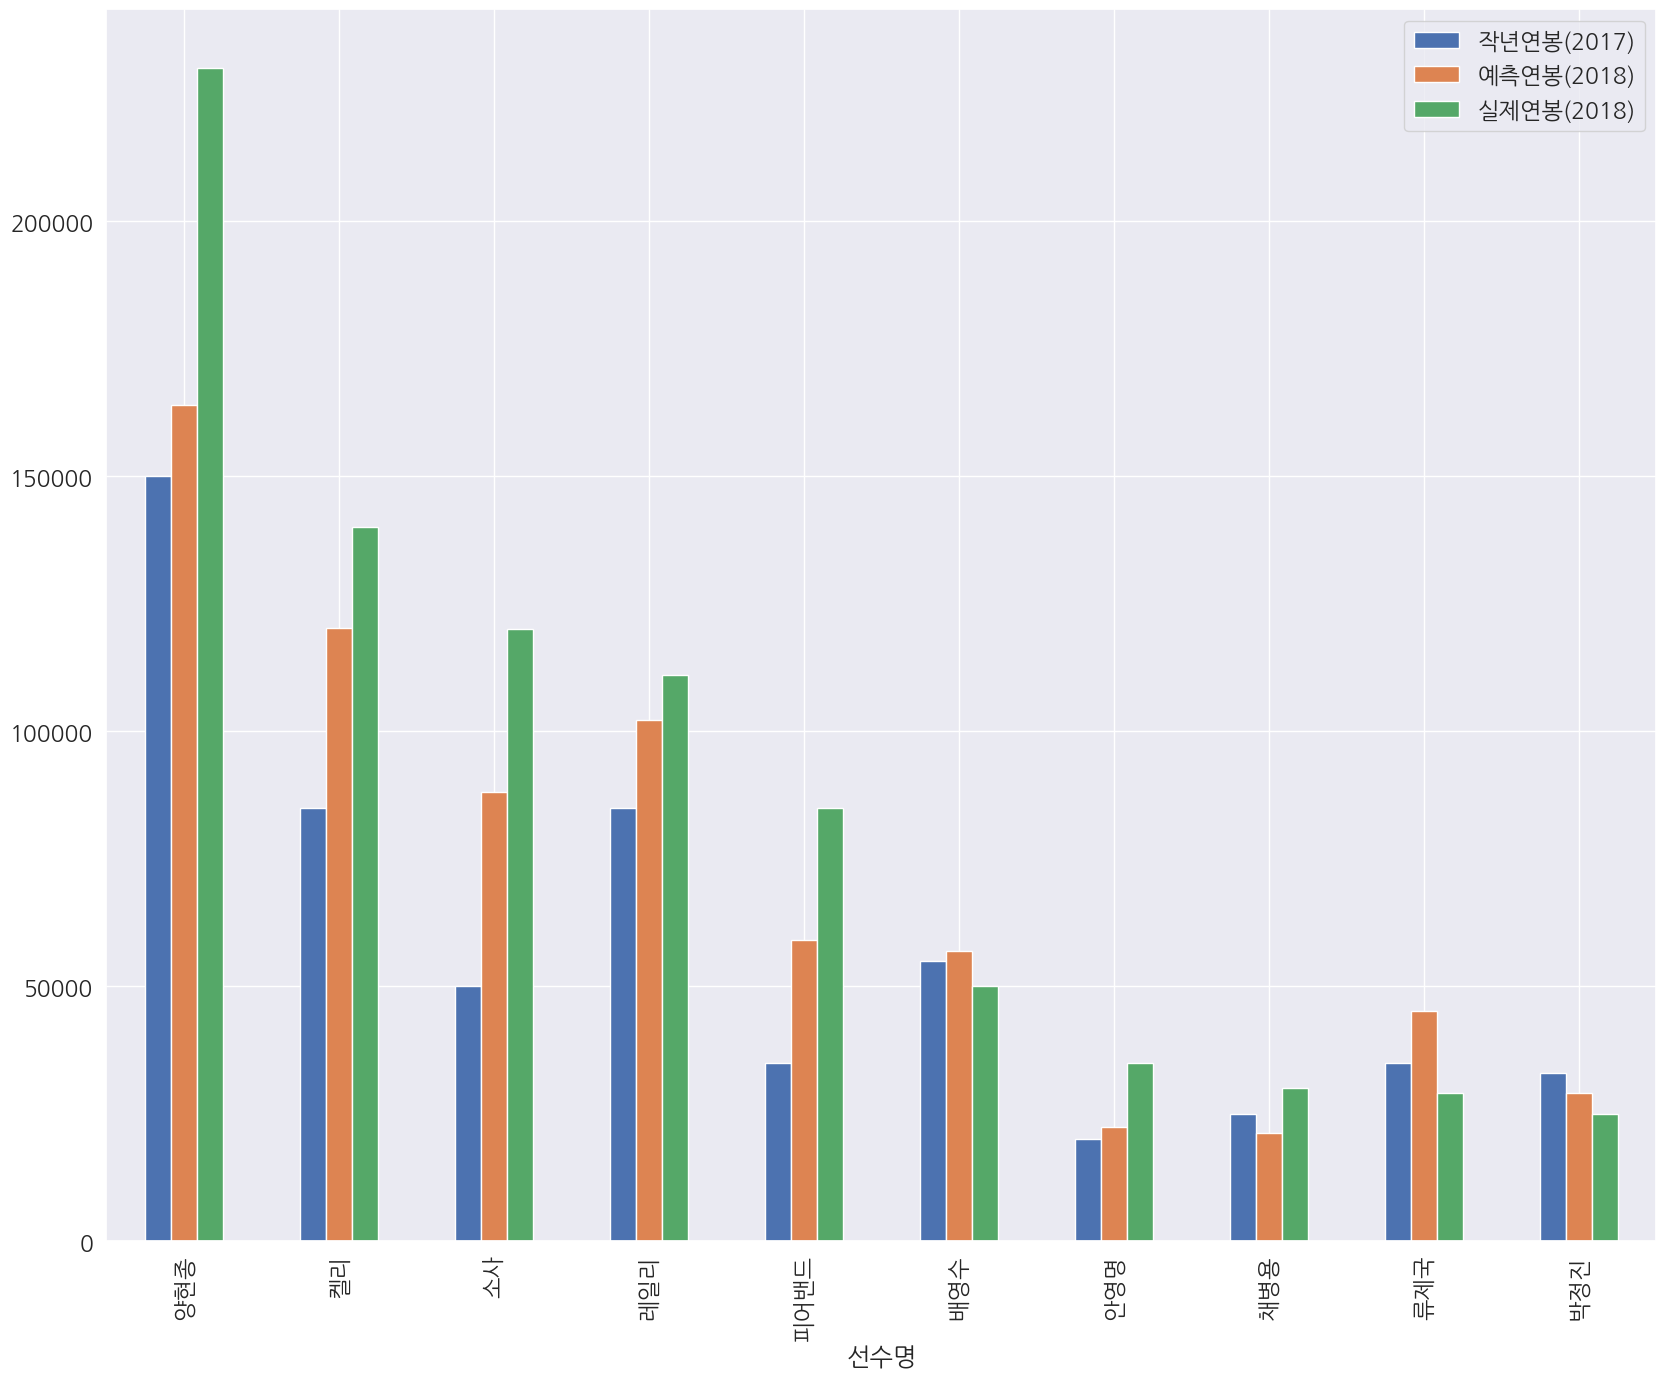

In [25]:
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")